importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import scipy.integrate as integrate
from scipy.optimize import fsolve
from matplotlib.collections import LineCollection

specifying Times New Roman font and to force that withing plotting commands

In [35]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

defining variables for line profile model

In [36]:
R_star = 1.e7 # km
V_inf = 2250. # km/s
beta = 1.0001
M_lossrate = 2*(10**(30))*1.e-6 # kg/s
R_shock = 1.5*R_star
T_star = 2.
u_o = R_star/R_shock
maxratio = 8. # max ratio of r/R_star on the grid, so that the grid plotted are scaled by R_star
q = 0
interval = 200

Ro = str(R_shock/R_star)
taustar = str(T_star)

optical depth over wavelength model

In [49]:
wavelength = np.linspace(-0.99999, 0.99999, 100*interval)
u = np.linspace(0.1, 0.9, 9)
beta = 1

optical_depth = []
x_u = []
for j in (u):
    arr_1 = []
    arr_2 = []
    for i in (wavelength):
        u_x = 1-np.absolute(i)**(1/beta)
        u_crit = fsolve(lambda c: ((1-c)**(beta))*((1-c**2)**0.5)-np.absolute(i), 0.4)[0]
        if u_x >= j:
            arr_2.append(i)
            if u_crit <= j and i >= 0:
                arr_1.append(np.inf)
            else:
                arr_1.append(np.log10(integrate.quad(lambda w: R_star/((((R_star/j)*(np.sqrt((1-j)**(2*beta)-i**2)/((1-j)**beta)))**2+w**2)*((1-R_star/np.sqrt(((R_star/j)*(np.sqrt((1-j)**(2*beta)-i**2)/((1-j)**beta)))**2+w**2))**beta)), -R_star*i/(j*((1-j)**beta)), 1.e3*R_star)[0]))
    optical_depth.append(arr_1)
    x_u.append(arr_2)

plotting

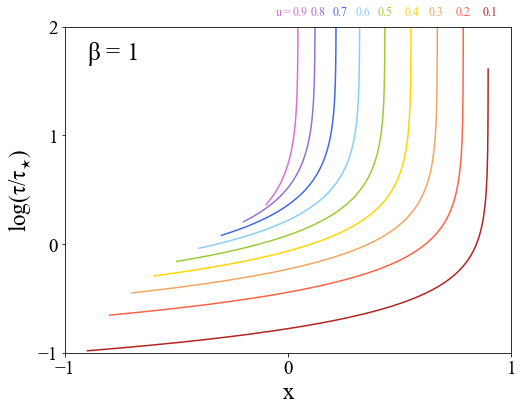

In [50]:
plt.figure(figsize = (8, 6))

plt.xlim(-1, 1)
plt.ylim(-1, 2)

plt.xlabel('x', fontname=tnr, fontsize=23)
plt.ylabel(r'log($\tau/\tau_{\star}$)', fontname=tnr, fontsize=23)
plt.xticks([-1, 0, 1], fontname=tnr, fontsize=19)
plt.yticks([-1, 0, 1, 2], fontname=tnr, fontsize=19)

color = ['firebrick', 'tomato', 'sandybrown', 'gold', 'yellowgreen', 'lightskyblue', 'royalblue', 'mediumpurple', 'orchid']
y_position = [0.87, 0.75, 0.63, 0.52, 0.4, 0.3, 0.2, 0.1, 0.02]
u_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
plt.text(-0.06, 2.1, 'u = ', size = 12, color = 'orchid')
plt.text(-0.9, 1.7, r'$\beta$ = 1', size = 25, color = 'k')

for i in range (0, 9):
    plt.plot(x_u[i], optical_depth[i], '-', lw = 1.5, color = color[i])
    plt.text(y_position[i], 2.1, u_label[i], size = 12, color = color[i])

plt.savefig('optical_depth_'+Ro+'_'+taustar+'.png', bbox_inches = 'tight')
plt.show()